In [7]:
import numpy as np
from typing import List
from scipy.optimize import linprog
import plotly.express as px


def nash_equilibrium(A: np.ndarray) -> List:
    m, n = A.shape

    b_ub1, b_ub2 = -np.ones(m, dtype=int), np.ones(n, dtype=int)

    gap = abs(A.min())
    A_ub1 = -np.transpose(A + gap)
    A_ub2 = A

    p = linprog(c=b_ub2, A_ub=A_ub1, b_ub=b_ub1, method="simplex")
    q = linprog(c=b_ub1, A_ub=A_ub2, b_ub=b_ub2, method="simplex")

    return {'first player strategy' : p.x / abs(p.fun),
            'second player strategy' : q.x / abs(q.fun),
            'result' : np.array([1 / p.fun - gap])}


def visualize(ans_list: dict):
    fig = px.scatter(x=np.arange(1, ans_list['first player strategy'].shape[0] + 1),
                     y=ans_list['first player strategy'],
                     title = 'Спектр оптимальных стратегий первого игрока',
                     labels={'x':'', 'y':'Оптимальные стратегии'}
                    )
    fig.show()
    fig = px.scatter(x=np.arange(1, ans_list['second player strategy'].shape[0] + 1),
                     y=ans_list['second player strategy'],
                     title = 'Спектр оптимальных стратегий второго игрока',
                     labels={'x':'', 'y':'Оптимальные стратегии'}
                    )
    fig.show()

### Cпектр оптимальной стратегии состоит из одной точки:

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:16: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:17: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.



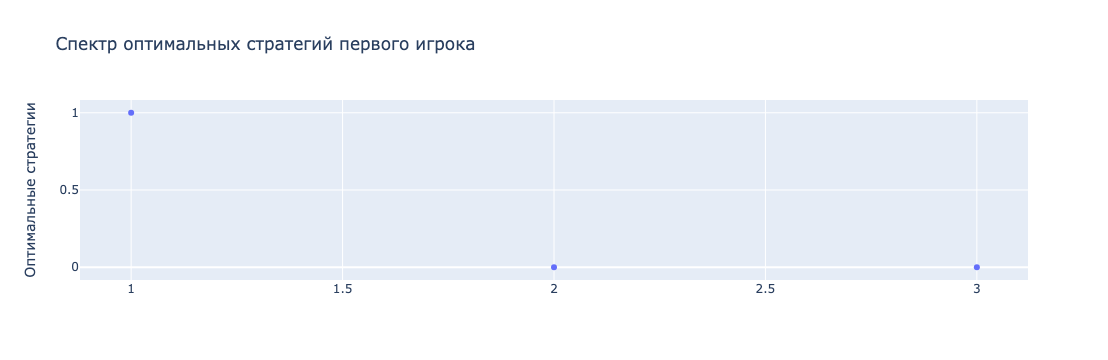

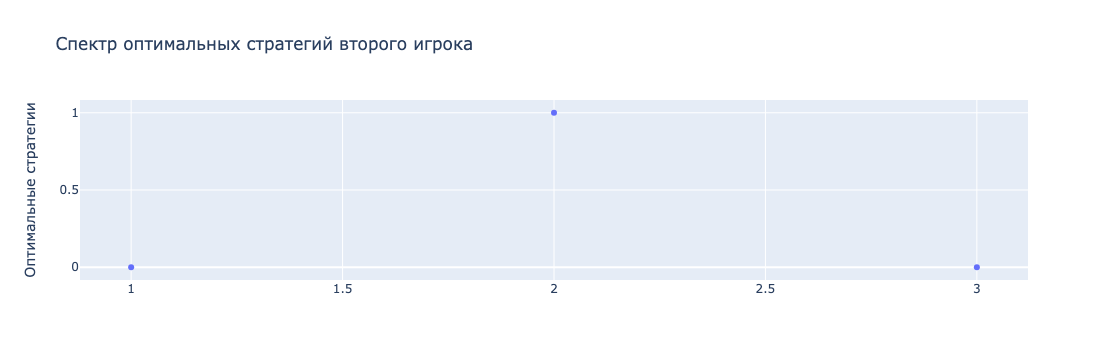

In [8]:
matrix = np.array([[33, 9, 55],[-1, 3, 3],[2, 2, -7]])
visualize(nash_equilibrium(matrix))

### Cпектр оптимальной стратегии неполон:

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:16: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:17: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.



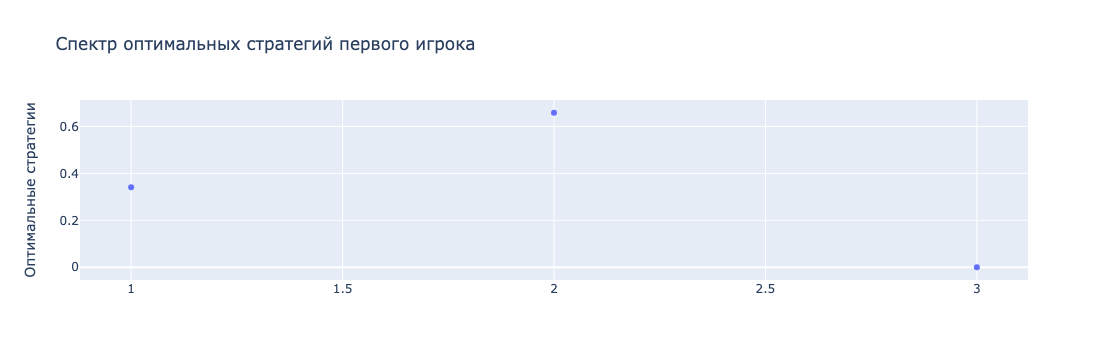

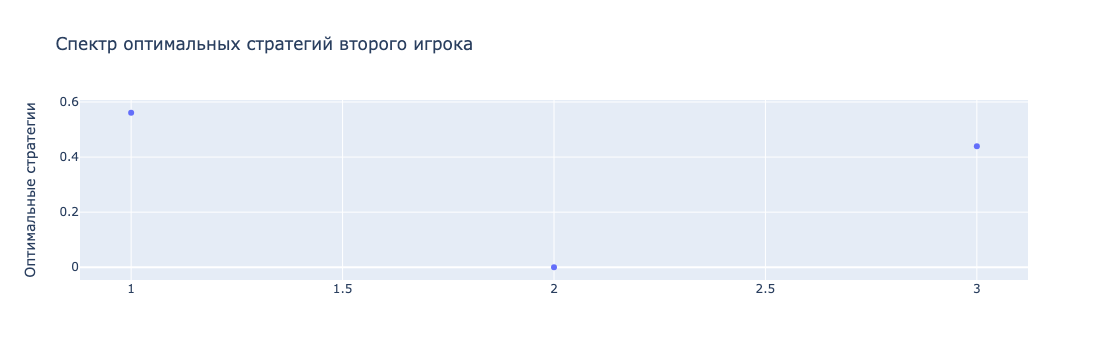

In [9]:
matrix = np.array([[5, -7, 32], [23, 34, 9],[9, 35, -8]])
visualize(nash_equilibrium(matrix))

### Cпектр оптимальной стратегии полон:

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:16: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.

/var/folders/d_/k4jnx1hn2dxfdly6c98vkfzw0000gn/T/ipykernel_21268/2666703485.py:17: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.



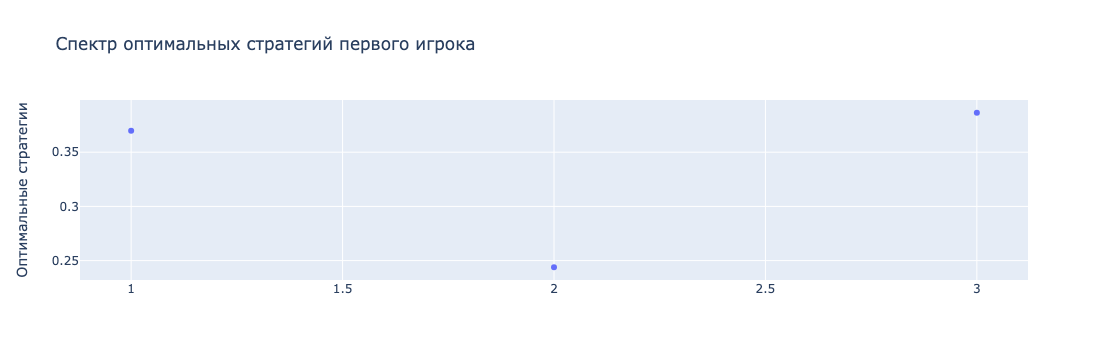

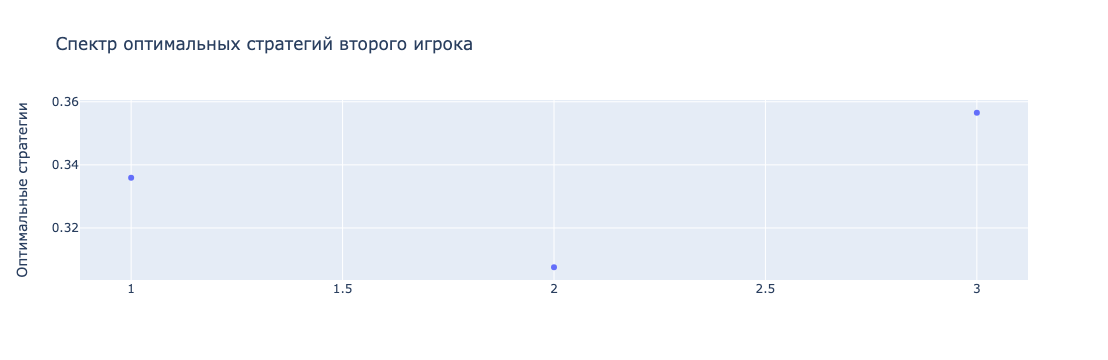

In [10]:
matrix = np.array([[5, -7, 32], [23, 0, 9], [9, 35, -8]])
visualize(nash_equilibrium(matrix))